# MNIST without Acquisition function

based on [this github](https://github.com/jiuntian/pytorch-mnist-example/blob/master/pytorch-mnist.ipynb)

In [1]:
import torch
import torchvision

In [2]:
batch_size_train = 256 # We use a small batch size here for training
batch_size_test = 1024 #

# define how image transformed
image_transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])
#image datasets
train_dataset = torchvision.datasets.MNIST('dataset/', 
                                           train=True, 
                                           download=True,
                                           transform=image_transform)
test_dataset = torchvision.datasets.MNIST('dataset/', 
                                          train=False, 
                                          download=True,
                                          transform=image_transform)
#data loaders
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size_train, 
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=batch_size_test, 
                                          shuffle=True)


In [24]:
for i in train_dataset:
    print(i[0].shape)
    break

torch.Size([1, 28, 28])


## Looking at the data

Label: tensor(7)


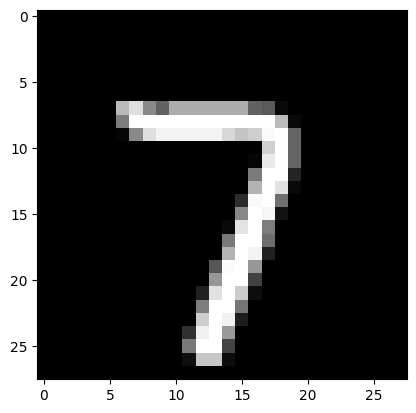

In [17]:
# import library
import matplotlib.pyplot as plt
# We can check the dataloader
_, (example_datas, labels) = next(enumerate(test_loader))
sample = example_datas[0][0]
# show the data
plt.imshow(sample, cmap='gray', interpolation='none')
print("Label: "+ str(labels[0]))

## initializing the neural network

In [4]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        #input channel 1, output channel 10
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5, stride=1)
        #input channel 10, output channel 20
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5, stride=1)
        #dropout layer
        self.conv2_drop = nn.Dropout2d()
        #fully connected layer
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = self.conv2(x)
        x = self.conv2_drop(x)
        x = F.max_pool2d(x, 2)
        x = F.relu(x)
        x = x.view(-1, 320)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x)
        x = self.fc2(x)
        return F.log_softmax(x)

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [6]:
## create model and optimizer
learning_rate = 0.01
momentum = 0.5
model = CNN().to(device) #using cpu here
optimizer = optim.SGD(model.parameters(), lr=learning_rate,
                      momentum=momentum)

In [7]:
from tqdm import tqdm_notebook as tqdm
##define train function
def train(model, device, train_loader, optimizer, epoch, log_interval=10000):
    model.train()
    tk0 = tqdm(train_loader, total=int(len(train_loader)))
    counter = 0
    for batch_idx, (data, target) in enumerate(tk0):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        counter += 1
        tk0.set_postfix(loss=(loss.item()*data.size(0) / (counter * train_loader.batch_size)))
##define test function
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item() # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True) # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [8]:
num_epoch = 10
for epoch in range(1, num_epoch + 1):
        train(model, device, train_loader, optimizer, epoch)
        test(model, device, test_loader)

C:\Users\hoiho\AppData\Local\Temp\ipykernel_7540\1895196525.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  tk0 = tqdm(train_loader, total=int(len(train_loader)))


  0%|          | 0/235 [00:00<?, ?it/s]

C:\Users\hoiho\AppData\Local\Temp\ipykernel_7540\3807246099.py:30: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)



Test set: Average loss: 0.8392, Accuracy: 7354/10000 (74%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.4815, Accuracy: 8558/10000 (86%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.3697, Accuracy: 8887/10000 (89%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.3111, Accuracy: 9104/10000 (91%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.2662, Accuracy: 9181/10000 (92%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.2392, Accuracy: 9316/10000 (93%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.2180, Accuracy: 9356/10000 (94%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.2056, Accuracy: 9406/10000 (94%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.1911, Accuracy: 9442/10000 (94%)



  0%|          | 0/235 [00:00<?, ?it/s]


Test set: Average loss: 0.1777, Accuracy: 9499/10000 (95%)

